In [9]:
# Install a pip package in the current Jupyter kernel - https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import sys
!{sys.executable} -m pip install matplotlib numpy

Plot score std over evorun iterations.

In [14]:
import json
#json_file_path = '/Users/bthj/QD/conf-duration_delta_pitch_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685965690117.json'
json_file_path = '/Users/bthj/QD/conf-static_mutation_rate_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685965696416.json'
x_multiplier = 1000  # Set this value as the step size in the JSON file name

# Read data from JSON file
def read_data_from_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

# Read data from JSON file
data = read_data_from_json(json_file_path)

Score stats means across all scores for one evorun iteration.

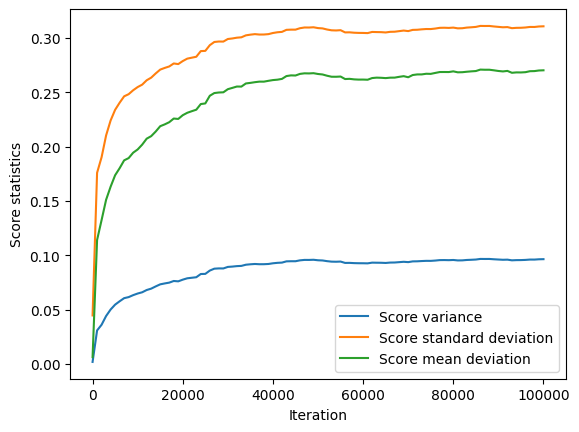

In [15]:
# populate the array scoreStandardDeviation with entries from the JSON file at evoRuns[0].iterations[0].scoreVariances[i].scoreStandardDeviation
scoreVariance = []
scoreStandardDeviation = []
scoreMeanDeviation = []
for i in range(len(data['evoRuns'][0]['iterations'][0]['scoreVariances'])):
    scoreVariance.append(data['evoRuns'][0]['iterations'][0]['scoreVariances'][i]['scoreVarianceAtIteration']['scoreVariance'])
    scoreStandardDeviation.append(data['evoRuns'][0]['iterations'][0]['scoreVariances'][i]['scoreVarianceAtIteration']['scoreStandardDeviation'])
    scoreMeanDeviation.append(data['evoRuns'][0]['iterations'][0]['scoreVariances'][i]['scoreVarianceAtIteration']['scoreMeanDeviation'])

# plot scoreStandardDeviation
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(len(scoreVariance)) * x_multiplier, scoreVariance, label='Score variance')
plt.plot(np.arange(len(scoreStandardDeviation)) * x_multiplier, scoreStandardDeviation, label='Score standard deviation')
plt.plot(np.arange(len(scoreMeanDeviation)) * x_multiplier, scoreMeanDeviation, label='Score mean deviation')

plt.ylabel('Score statistics')
plt.xlabel('Iteration')
plt.legend()
plt.show()



Score stats taken independently for each genome, and then averaged; e.g. std of scores for each genome.

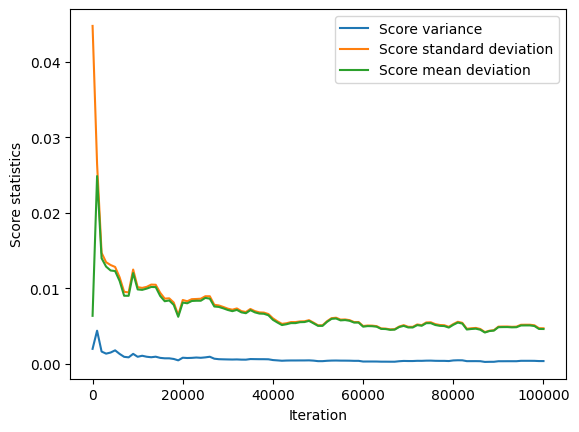

In [17]:
averageGenomeScoreVariance = []
averageGenomeScoreStandardDeviation = []
averageGenomeScoreMeanDeviation = []
for i in range(len(data['evoRuns'][0]['iterations'][0]['scoreVariances'])):
    averageGenomeScoreVariance.append(data['evoRuns'][0]['iterations'][0]['scoreVariances'][i]['scoreVarianceForElitesAtIteration']['averageGenomeScoreVariance'])
    averageGenomeScoreStandardDeviation.append(data['evoRuns'][0]['iterations'][0]['scoreVariances'][i]['scoreVarianceForElitesAtIteration']['averageGenomeScoreStandardDeviation'])
    averageGenomeScoreMeanDeviation.append(data['evoRuns'][0]['iterations'][0]['scoreVariances'][i]['scoreVarianceForElitesAtIteration']['averageGenomeScoreMeanDeviation'])

# plot scoreStandardDeviation
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(len(averageGenomeScoreVariance)) * x_multiplier, averageGenomeScoreVariance, label='Score variance')
plt.plot(np.arange(len(averageGenomeScoreStandardDeviation)) * x_multiplier, averageGenomeScoreStandardDeviation, label='Score standard deviation')
plt.plot(np.arange(len(averageGenomeScoreMeanDeviation)) * x_multiplier, averageGenomeScoreMeanDeviation, label='Score mean deviation')

plt.ylabel('Score statistics')
plt.xlabel('Iteration')
plt.legend()
plt.show()